<a href="https://colab.research.google.com/github/manjunath-hanmantgad/python-development/blob/master/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualising outliers

In [1]:
# using boxplots 
# iqr = (75th - 25th ) quantile
# upper_boundary = 75th quantile + (iqr * 1.5)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.datasets import fetch_california_housing

# load dataset
X,y = fetch_california_housing(return_X_y=True, as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


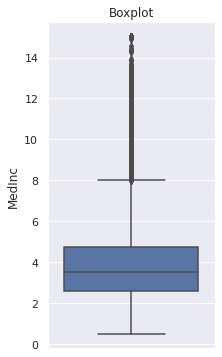

In [4]:
#boxplot for MedInc variable
plt.figure(
    figsize=(3,6)
)
sns.boxplot(
    y=X["MedInc"]
)
plt.title("Boxplot")
plt.show()

### using the mean and standard deviation